<a href="https://colab.research.google.com/github/Frasierzzz/DPDM2024/blob/main/DPDM2024_Exam(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ไลบารี่ที่ใช้ และไฟล์ที่อัปโหลด

In [185]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import cv2
import copy

In [186]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [187]:
facebook_engagement = pd.read_csv('/content/drive/MyDrive/DPDM2024_Exam/Data_Docter.csv')
facebook_engagement.head()

,name,comments,ยอดไลค์,จำนวนการตอบกลับ
0,ศ.นพ.ชวลิต ศูนย์มะเร็ง รพ.จุฬาลงกรณ์,กดที่ลิงค์นี้เพื่อเข้าไปอ่านคอมเม้นของโพสต์ครั...,456,3
1,Nubeer Kithiya,เป็นมะเร็งลำไส้ใหญ่ ระยะที่ 3 ตอนอายุ 26 ค่ะ พ...,1400,70
2,วาสนา คุ้มจิตต์,แม่เป็นมะเร็งขั้วปอด ลามขึ้นสมองค่ะ เริ่มแรกที...,402,11
3,Wansook Chompoo Ploy,#มะเร็งปากมดลูกระยะCINlll เกือบเข้าระยะ 1 ตอนอ...,1600,44
4,Aphit Aphit,ลูกสาวเป็นมะเร็งกระดูก Osteosarcomaช่วงเข่า อา...,480,5


# แก้ไขชื่อคอลัมน์ และตรวจสอบคอมเม้นท์ที่เกี่ยวข้องกับมะเร็ง

In [188]:
# เนื่องจากชื่อของคอลัมน์เป็นภาษาไทย เพื่อไม่ให้มีปัญหาทีหลัง เราจึงเปลี่ยนชื่อคอลัมน์เป็นภาษาอังกฤษ
facebook_engagement = facebook_engagement.rename(columns={'ยอดไลค์': 'count like'})
facebook_engagement = facebook_engagement.rename(columns={'จำนวนการตอบกลับ': 'count replies'})
facebook_engagement

,name,comments,count like,count replies
0,ศ.นพ.ชวลิต ศูนย์มะเร็ง รพ.จุฬาลงกรณ์,กดที่ลิงค์นี้เพื่อเข้าไปอ่านคอมเม้นของโพสต์ครั...,456,3
1,Nubeer Kithiya,เป็นมะเร็งลำไส้ใหญ่ ระยะที่ 3 ตอนอายุ 26 ค่ะ พ...,1400,70
2,วาสนา คุ้มจิตต์,แม่เป็นมะเร็งขั้วปอด ลามขึ้นสมองค่ะ เริ่มแรกที...,402,11
3,Wansook Chompoo Ploy,#มะเร็งปากมดลูกระยะCINlll เกือบเข้าระยะ 1 ตอนอ...,1600,44
4,Aphit Aphit,ลูกสาวเป็นมะเร็งกระดูก Osteosarcomaช่วงเข่า อา...,480,5
...,...,...,...,...
1648,Fear Q'bick,Jitladda Thonglukkeaw มาแชเร้ว ได้บุนนะ,0,0
1649,Toei Nittiya,Kamta Auttakan,0,0
1650,Ouiaii Promsuan,อนุชา มีลาภ,0,0
1651,Thanyalak Banboo,Na Nat Fari Kawa II Herbara Binti Abdullah Ras...,0,0


# จุดที่น่าสนใจที่ 1: คอมเม้นท์ที่มียอดไลค์ หรือจำนวนการตอบกลับเท่ากับ 0

In [189]:
# prompt: สร้างตัวแปร x มารับ record จาก facebook_engagement ที่มี count like	 หรือ count replies เท่ากับ 0

zero_engagement = facebook_engagement[(facebook_engagement['count like'] == 0) | (facebook_engagement['count replies'] == 0)]
zero_engagement

,name,comments,count like,count replies
8,Varatchaya Thavanpongloed,แม่ตรวจเจอมะเร็งปี2554 ไม่มีอาการเจ็บปวดใดๆ แต...,0,0
15,Pariyaphat K Panumphun,แม่มีปีกจมูกที่บวมแต่แข็ง1ข้าง เป็นมานาน ไม่เจ...,0,0
19,WieWi Maka,พ่อเป็นมะเร็งกระเพาะอาหาร พ่อไม่สูบบุหรี่ แต่พ...,0,0
21,ทักษิณานันท์ ม่วงภูเขียว,เป็นประโยชน์มากๆค่ะขอบคุณมากๆค่ะ,0,0
23,Aorry Salutuu,พ่อเป็นมะเร็งเม็ดเลือดขาว…รักษาอยู่ประมาน3ปี พ...,0,0
...,...,...,...,...
1648,Fear Q'bick,Jitladda Thonglukkeaw มาแชเร้ว ได้บุนนะ,0,0
1649,Toei Nittiya,Kamta Auttakan,0,0
1650,Ouiaii Promsuan,อนุชา มีลาภ,0,0
1651,Thanyalak Banboo,Na Nat Fari Kawa II Herbara Binti Abdullah Ras...,0,0


จะเห็นว่าคอมเม้นท์จะแยกออกเป็น 3 ประเภทได้แก่
1. ประเภทคอมเม้นท์ที่เกี่ยวข้องกับมะเร็ง
2. ประเภทคอมเม้นท์ที่แท็กคนอื่น
3. ประเภทคอมเม้นท์ที่กล่าวขอบคุณ

In [190]:
cancer_related_comments_zero_engagement = zero_engagement[zero_engagement['comments'].str.contains('มะเร็ง', na=False)]
cancer_related_comments_zero_engagement

,name,comments,count like,count replies
8,Varatchaya Thavanpongloed,แม่ตรวจเจอมะเร็งปี2554 ไม่มีอาการเจ็บปวดใดๆ แต...,0,0
15,Pariyaphat K Panumphun,แม่มีปีกจมูกที่บวมแต่แข็ง1ข้าง เป็นมานาน ไม่เจ...,0,0
19,WieWi Maka,พ่อเป็นมะเร็งกระเพาะอาหาร พ่อไม่สูบบุหรี่ แต่พ...,0,0
23,Aorry Salutuu,พ่อเป็นมะเร็งเม็ดเลือดขาว…รักษาอยู่ประมาน3ปี พ...,0,0
29,Nook Kannika,พ่อเป็นมะเร็งต่อมลูกหมาก อาการคือฉีไม่สะดวกคะ ...,0,0
...,...,...,...,...
1639,Amika Phs,แม่เป็นมะเร็งตับค่ะ เพราะก่อนหน้านั้นแม่ทำงานร...,0,0
1641,Woranaphatchon Phupho,ไม่ได้เป็นเองแต่ขอเล่าของคุณตาค่ะ เป็นมะเร็งตอ...,0,0
1643,Narisa Mohthong,พ่อเป็น มะเร็งปอด ระยะ4 (ยังไม่แพร่กระจาย)แบบไ...,0,0
1644,Chanisara Hom,พ่อเป็นมะเร็งลำไส้ชอบกินอาหารสุกๆ ดิบค่ะ ขับถ่...,0,0


In [191]:
another_comments = zero_engagement[~zero_engagement.index.isin(cancer_related_comments_zero_engagement.index)]
len(another_comments)

1089

# จุดที่น่าสนใจที่ 2: ปัจจัยที่เกี่ยวข้องกับความนิยมของคอมเม้นท์ และประเภทของมะเร็ง

In [192]:
# ทำการกรองเอาเฉพาะคอมเม้นท์ที่เกี่ยวข้องกับมะเร็ง
cancer_related_comments = facebook_engagement[facebook_engagement['comments'].str.contains('มะเร็ง', na=False)]
cancer_related_comments

,name,comments,count like,count replies
1,Nubeer Kithiya,เป็นมะเร็งลำไส้ใหญ่ ระยะที่ 3 ตอนอายุ 26 ค่ะ พ...,1400,70
2,วาสนา คุ้มจิตต์,แม่เป็นมะเร็งขั้วปอด ลามขึ้นสมองค่ะ เริ่มแรกที...,402,11
3,Wansook Chompoo Ploy,#มะเร็งปากมดลูกระยะCINlll เกือบเข้าระยะ 1 ตอนอ...,1600,44
4,Aphit Aphit,ลูกสาวเป็นมะเร็งกระดูก Osteosarcomaช่วงเข่า อา...,480,5
5,Ize Atitya,ลูกสาว 5 ขวบ เป็นมะเร็งสมองคะ ไม่มีอาการอะไร น...,1500,23
...,...,...,...,...
1639,Amika Phs,แม่เป็นมะเร็งตับค่ะ เพราะก่อนหน้านั้นแม่ทำงานร...,0,0
1641,Woranaphatchon Phupho,ไม่ได้เป็นเองแต่ขอเล่าของคุณตาค่ะ เป็นมะเร็งตอ...,0,0
1643,Narisa Mohthong,พ่อเป็น มะเร็งปอด ระยะ4 (ยังไม่แพร่กระจาย)แบบไ...,0,0
1644,Chanisara Hom,พ่อเป็นมะเร็งลำไส้ชอบกินอาหารสุกๆ ดิบค่ะ ขับถ่...,0,0


## ดูชนิดของมะเร็ง ตามคอมเม้นท์ที่มียอดการไลค์ และยอดการตอบกลับสูงสุด

In [193]:
# คอมเมนต์ที่มียอดไลค์สูงๆ
top_liked_comment = cancer_related_comments.sort_values(by='count like', ascending=False)
top_liked_comment.iloc[0:10,:]

,name,comments,count like,count replies
3,Wansook Chompoo Ploy,#มะเร็งปากมดลูกระยะCINlll เกือบเข้าระยะ 1 ตอนอ...,1600,44
5,Ize Atitya,ลูกสาว 5 ขวบ เป็นมะเร็งสมองคะ ไม่มีอาการอะไร น...,1500,23
1,Nubeer Kithiya,เป็นมะเร็งลำไส้ใหญ่ ระยะที่ 3 ตอนอายุ 26 ค่ะ พ...,1400,70
4,Aphit Aphit,ลูกสาวเป็นมะเร็งกระดูก Osteosarcomaช่วงเข่า อา...,480,5
46,Neung Lertsak,ผมเป็นมะเร็งเม็ดสีผิวหนังชนิดร้ายแรง(Melanoma)...,477,30
2,วาสนา คุ้มจิตต์,แม่เป็นมะเร็งขั้วปอด ลามขึ้นสมองค่ะ เริ่มแรกที...,402,11
10,นู๋นิด ขนิษฐา,ขอให้เรื่องราวของพ่อกับพี่ชายเราเป็นวิทยาทานแก...,353,25
16,Nok Wasanok Wassana,ขอแชร์ประสบการณ์นะคะ แม่เป็นผู้ป่วยมะเร็งต่อมน...,332,6
6,Pam Prechanont,คุณแม่เป็นมะเร็งเม็ดเลือดขาวแบบเฉียบพลันค่ะ คุ...,300,9
17,Jin Ping Jern,คุณพ่อเราเป็น #มะเร็งหลังโพรงจมูก ค่ะ นับย้อนไ...,210,3


In [194]:
# คอมเมนต์ที่มียอดตอบกลับสูงๆ
top_replies_comment = cancer_related_comments.sort_values(by='count replies', ascending=False)
top_replies_comment.iloc[0:10,:]

,name,comments,count like,count replies
1,Nubeer Kithiya,เป็นมะเร็งลำไส้ใหญ่ ระยะที่ 3 ตอนอายุ 26 ค่ะ พ...,1400,70
3,Wansook Chompoo Ploy,#มะเร็งปากมดลูกระยะCINlll เกือบเข้าระยะ 1 ตอนอ...,1600,44
22,รมิตา ผู้หญิงที่เป็นของขวัญ,สำหรับมะเร็งปากมดลูก แนะนำให้ตรวจภายในเป็นประจ...,102,31
46,Neung Lertsak,ผมเป็นมะเร็งเม็ดสีผิวหนังชนิดร้ายแรง(Melanoma)...,477,30
113,Phacharatorn Subsiritavee,ผมเป็นมะเร็งลำไส้ใหญ่ระยะที่ 3 (ปัจจุบันรักษาห...,33,28
92,Voravit Kanpai,อายุ39ปีเป็นมะเร็งลำไส้ครับ แรกๆอาการคล้ายโรคก...,116,27
10,นู๋นิด ขนิษฐา,ขอให้เรื่องราวของพ่อกับพี่ชายเราเป็นวิทยาทานแก...,353,25
5,Ize Atitya,ลูกสาว 5 ขวบ เป็นมะเร็งสมองคะ ไม่มีอาการอะไร น...,1500,23
30,องุ่น รสสุคนธ์,คุณพ่อเป็นมะเร็งตับ ก่อนหน้านี้เวลากินอาหารจะช...,165,19
109,Giw Barbegiw,เป็นมะเร็งเต้านมค่ะ แรกเริ่มอยู่ๆรู้สึกว่าหน้า...,44,16


โดยชนิดของมะเร็งที่มียอดไลค์สูงที่สุด คือ มะเร็งปากมดลูก

และมะเร็งที่มียอดการตอบกลับสูงสุด คือ มะเร็งลำไส้ใหญ่ (เกิดได้ทุกเพศทุกวัย)

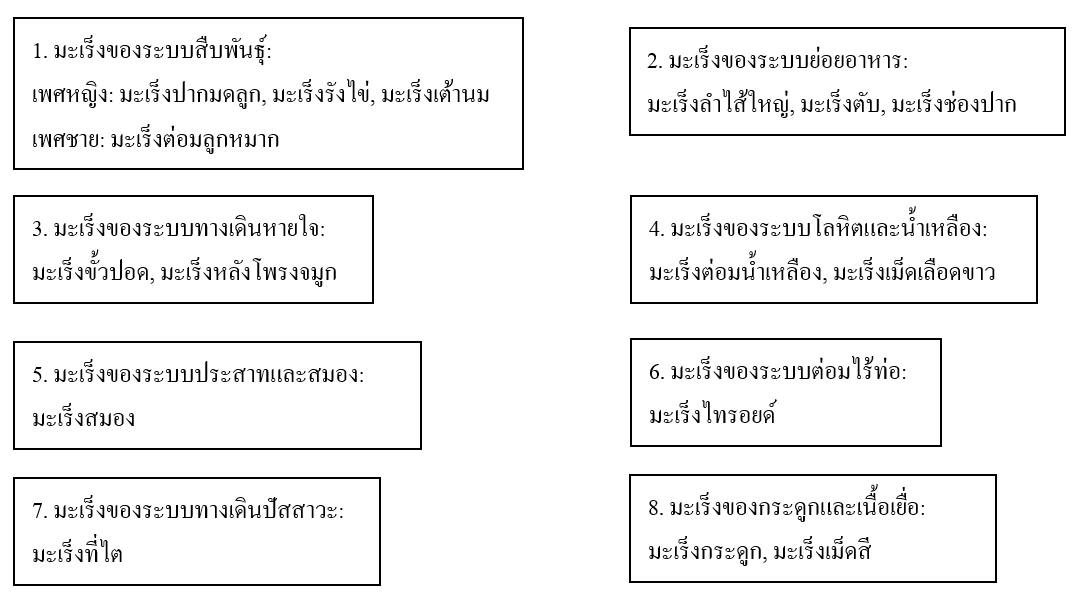

In [195]:
image_path = '/content/drive/MyDrive/DPDM2024_Exam/cancer.png'
img = cv2.imread(image_path)
cv2_imshow(img)

จากการสังเกตจากคอมเม้นท์ที่มียอดไลค์ และยอดตอบกลับคอมเม้นท์สูงๆ  50 record จะพบว่าโรคมะเร็งที่พบในคอมเม้นท์ต่างๆ สามารถจัดกลุ่มของชนิดมะเร็งจากระบบในร่างกายได้ ซึ่งประกอบไปด้วย  


## ดูชนิดของมะเร็ง ตามยอดการตอบโต้ (ไลค์ + คอมเม้นท์ตอบกลับ)

โดยทั่วไปอัลกอริทึมของเฟสบุ๊คจะนับยอดการตอบโต้จาก แชร์ > คอมเม้นท์ > ไลค์
นั่นคือคอมเม้นท์ที่คนส่วนใหญ่จะเห็นย่อมเป็นคอมเม้นท์ที่ยอดการตอบโต้เยอะๆ ดังนั้นอันดับแรกเราจึงจะลองตรวจสอบคอมเม้นท์ที่มีจำนวนยอดไลค์สูงสุด และจำนวนการตอบกลับสูงสุด

In [196]:
like_score = 1
reply_score = 5

อันดับต่อมาเราจะลองให้คะแนนของการตอบโต้ โดยให้คะแนนของไลค์ คือ 1 และคะแนนของการตอบกลับคือ 5 แต่ในความเป็นจริงแล้วเราไม่สามารถทราบได้ว่าคะแนนของการตอบโต้ที่แท้จริงคือเท่าใด และมีปัจจัยใดอีกที่เกี่ยวข้องแต่เราทราบแค่ อะไรมากกว่าอะไร
เพื่อให้สามารถเรียงลำดับของคอมเม้นท์ตามคะแนนการตอบโต้ได้

In [197]:
# prompt: สร้างคอลัมน์ใหม่ในตาราง cancer_related_comments ให้ตั้งชื่อว่า Total score โดย total score = coumt like*like score + reply_score*count replies
cancer_related_comments_total = copy.deepcopy(cancer_related_comments)
cancer_related_comments_total['total score'] = cancer_related_comments_total['count like'] * like_score + cancer_related_comments_total['count replies'] * reply_score
cancer_related_comments_total = cancer_related_comments_total[cancer_related_comments_total['total score'] != 0].sort_values(by='total score', ascending=False)
cancer_related_comments_total.head()

,name,comments,count like,count replies,total score
3,Wansook Chompoo Ploy,#มะเร็งปากมดลูกระยะCINlll เกือบเข้าระยะ 1 ตอนอ...,1600,44,1820
1,Nubeer Kithiya,เป็นมะเร็งลำไส้ใหญ่ ระยะที่ 3 ตอนอายุ 26 ค่ะ พ...,1400,70,1750
5,Ize Atitya,ลูกสาว 5 ขวบ เป็นมะเร็งสมองคะ ไม่มีอาการอะไร น...,1500,23,1615
46,Neung Lertsak,ผมเป็นมะเร็งเม็ดสีผิวหนังชนิดร้ายแรง(Melanoma)...,477,30,627
4,Aphit Aphit,ลูกสาวเป็นมะเร็งกระดูก Osteosarcomaช่วงเข่า อา...,480,5,505


โดยเมื่อใช้คะแนนในการเรียงลำดับจะเห็นว่าคอมเม้นท์ที่ได้รับความนิยมสูงสุด 5 อันดับแรกได้แก่ มะเร็งปากมดลูก มะเร็งลำไส้ใหญ่ มะเร็งสมอง มะเร็งเม็ดสี และมะเร็งกระดูก ตามลำดับ

## ดูชนิดของมะเร็ง ตามช่วงอายุที่คาดว่ามีโอกาสเป็นมะเร็งสูง

In [198]:
# สร้างฟังก์ชันสำหรับกรองอายุในคอมเม้นท์
import re

def extract_ages(text,age_n):
    # หาคำที่เกี่ยวกับอายุ
    age_matches = re.findall(r'อายุ\s*(\d+)', text)
    # แปลงเป็นตัวเลขแล้วกรองอายุที่น้อยกว่า 50
    ages_under_age_n = [int(age) for age in age_matches if int(age) < age_n]
    return ages_under_age_n


โดยเราจะตัดตอมเม้นท์ที่ไม่ได้มีการบ่งบอกอายุ ถึงแม้จะกล่าวถึงโรคมะเร็งออกไปด้วย

In [199]:
cancer_related_comments_under_50 = copy.deepcopy(cancer_related_comments)
cancer_related_comments_under_50['ages'] = cancer_related_comments_under_50['comments'].apply(lambda x: extract_ages(x, 50))
cancer_related_comments_under_50 = cancer_related_comments_under_50[cancer_related_comments_under_50['ages'].apply(len) > 0].sort_values(by='count like', ascending=False)
cancer_related_comments_under_50

,name,comments,count like,count replies,ages
3,Wansook Chompoo Ploy,#มะเร็งปากมดลูกระยะCINlll เกือบเข้าระยะ 1 ตอนอ...,1600,44,[30]
1,Nubeer Kithiya,เป็นมะเร็งลำไส้ใหญ่ ระยะที่ 3 ตอนอายุ 26 ค่ะ พ...,1400,70,[26]
31,Tiw Rungsie,สำหรับผู้หญิง ที่มีประจำเดือน ที่มามากผิดปกติ ...,138,13,[32]
92,Voravit Kanpai,อายุ39ปีเป็นมะเร็งลำไส้ครับ แรกๆอาการคล้ายโรคก...,116,27,[39]
18,Yani Insa,น้าเป็นมะเร็งกระดูกค่ะ จุดเริ่มอยู่ที่ต้นขาช่...,53,3,[45]
...,...,...,...,...,...
410,Parnwas Kaenampasuk,เป็นมะเร็งเม็ดเลือดขาว ตอนอายุ24ค่ะอาการคือเวี...,0,0,[24]
417,Pair Sripunyapat,#มะเร็งเต้านม ตอนอายุ 31 กิจวัตรทั่วไป นอนดึก ...,0,0,"[31, 17]"
420,Viga Visadvisai,เป็นมะเร็งต่อมไทรอยด์ตอนอายุ28วันดีคืนดี เสียง...,0,0,[28]
430,Simakorn Chotchakornpant,ลูกสาวตรวจพบมะเร็งเม็ดเลือดขาวชนิด ALL ตอนอายุ...,0,0,[10]


In [200]:
# prompt: สร้างคอมพลิเมนต์ของ cancer_related_comments_under_50 และตั้งชื่อใหม่ว่า cancer_related_comments_higher_50

cancer_related_comments_higher_50 = cancer_related_comments[~cancer_related_comments.index.isin(cancer_related_comments_under_50.index)]
cancer_related_comments_higher_50['ages'] = cancer_related_comments_higher_50['comments'].apply(lambda x: extract_ages(x, 100))
cancer_related_comments_higher_50 = cancer_related_comments_higher_50[cancer_related_comments_higher_50['ages'].apply(len) > 0].sort_values(by='count like', ascending=False)
len(cancer_related_comments_higher_50)
cancer_related_comments_higher_50

<ipython-input-200-4f487519d495>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancer_related_comments_higher_50['ages'] = cancer_related_comments_higher_50['comments'].apply(lambda x: extract_ages(x, 100))


,name,comments,count like,count replies,ages
16,Nok Wasanok Wassana,ขอแชร์ประสบการณ์นะคะ แม่เป็นผู้ป่วยมะเร็งต่อมน...,332,6,[68]
30,องุ่น รสสุคนธ์,คุณพ่อเป็นมะเร็งตับ ก่อนหน้านี้เวลากินอาหารจะช...,165,19,[61]
115,Suwaree Korkasetwit,คุณตาอายุ 71 ปีเป็นมะเร็งต่อมลูกหมาก เริ่มมีอา...,12,1,[71]
148,JO Thanaphat,#มะเร็งตับ แม่แฟนอายุ60 ไม่เคยดื่มเหล้า ไม่สูบ...,6,2,[60]
15,Pariyaphat K Panumphun,แม่มีปีกจมูกที่บวมแต่แข็ง1ข้าง เป็นมานาน ไม่เจ...,0,0,[57]
509,Yanisa Chusaengchun,ยายเราชอบกินหวาน กินชาเย็นทุกวัน ชอบกินอาหารอ...,0,0,"[50, 84, 88]"
392,Thanyathip Thongpunpan,คุณแม่อายุ73ปี ตรวจพบเป็นมะเร็งลำไส้ เมื่อเดือ...,0,0,[73]
394,Sirirat Pititada,ตอนอายุ 58 ระหว่างอาบน้ำคลำเต้านมมือสะดุดก้อนแ...,0,0,[58]
402,Nongrote Ja,ของแม่อายุ71ปี พึ่งทราบเมื่อเดือนตค.66ว่าเป็น...,0,0,[71]
431,Onnitcha Chuankid,แชร์ประสบการแม่เป็นมะเร็งลำไส้ เสียชีวิตตอนนั้...,0,0,[53]


พบว่าคอมเม้นท์ผู้ที่ป่วยเป็นโรคมะเร็งส่วนใหญ่มีอายุน้อยกว่า 50 ปี


อีกทั้งคอมเม้นท์ที่เกี่ยวข้องกับมะเร็งที่มียอดการไลค์ และการตอบกลับสูงๆ มักจะเป็นคอมเม้นท์ของผู้ป่วยมะเร็งที่มีอายุน้อยกว่า 50 ปี

## ดูชนิดของมะเร็ง ตามเพศของผู้ป่วย

โดยจะใช้การแบ่งเบื้องต้น ตามคำลงท้ายภายในคอมเม้นท์ซึ่งอาจจะมีหลายๆ record ที่หายไป แต่นี่้ป็นเพีงการตรวจสอบเบื้องต้น

In [201]:
def detect_gender(text):
    # คำที่บ่งบอกเพศในข้อความ
    male_indicators = ['พ่อ', 'ลุง', 'คุณอา' ,'คุณตา', 'ปู่', 'สามี', 'น้องชาย', 'ลูกชาย', 'หลานชาย', 'ครับ', 'ผม', 'ต่อมลูกหมาก']
    female_indicators = ['แม่', 'ป้า', 'น้า', 'ยาย', 'ย่า', 'ภรรยา', 'เธอ', 'น้องสาว', 'ลูกสาว', 'หลานสาว', 'คะ', 'ค่ะ', 'หนู', 'มดลูก', 'รังไข่']

    # ตรวจสอบคำที่บ่งบอกเพศ
    found_male = (word in text for word in male_indicators)
    found_female = (word in text for word in female_indicators)

    # หากพบคำที่บ่งบอกเพศทั้งสองประเภท
    if found_male and found_female:
        # ตรวจสอบคำแรกที่พบ
        for word in male_indicators:
            if word in text:
                return 'M'
        for word in female_indicators:
            if word in text:
                return 'F'
    elif found_male:
        return 'M'
    elif found_female:
        return 'F'

    # หากไม่พบคำที่บ่งบอกเพศ
    return 'U'

In [202]:
# prompt: สร้างคอลัมน์ใหม่ชื่อ gender โดยใช้ฟังก์ชัน detect_gender ในการตรวจสอบเพศของ cancer_related_comments

cancer_related_comments_gender = copy.deepcopy(cancer_related_comments)
cancer_related_comments_gender['gender'] = cancer_related_comments_gender['comments'].apply(detect_gender)
cancer_related_comments_gender = cancer_related_comments_gender.sort_values(by='count like', ascending=False)
cancer_related_comments_gender.iloc[0:10,:]

,name,comments,count like,count replies,gender
3,Wansook Chompoo Ploy,#มะเร็งปากมดลูกระยะCINlll เกือบเข้าระยะ 1 ตอนอ...,1600,44,F
5,Ize Atitya,ลูกสาว 5 ขวบ เป็นมะเร็งสมองคะ ไม่มีอาการอะไร น...,1500,23,F
1,Nubeer Kithiya,เป็นมะเร็งลำไส้ใหญ่ ระยะที่ 3 ตอนอายุ 26 ค่ะ พ...,1400,70,F
4,Aphit Aphit,ลูกสาวเป็นมะเร็งกระดูก Osteosarcomaช่วงเข่า อา...,480,5,F
46,Neung Lertsak,ผมเป็นมะเร็งเม็ดสีผิวหนังชนิดร้ายแรง(Melanoma)...,477,30,M
2,วาสนา คุ้มจิตต์,แม่เป็นมะเร็งขั้วปอด ลามขึ้นสมองค่ะ เริ่มแรกที...,402,11,F
10,นู๋นิด ขนิษฐา,ขอให้เรื่องราวของพ่อกับพี่ชายเราเป็นวิทยาทานแก...,353,25,M
16,Nok Wasanok Wassana,ขอแชร์ประสบการณ์นะคะ แม่เป็นผู้ป่วยมะเร็งต่อมน...,332,6,F
6,Pam Prechanont,คุณแม่เป็นมะเร็งเม็ดเลือดขาวแบบเฉียบพลันค่ะ คุ...,300,9,F
17,Jin Ping Jern,คุณพ่อเราเป็น #มะเร็งหลังโพรงจมูก ค่ะ นับย้อนไ...,210,3,M


In [203]:
cancer_related_comments_gender['gender'].value_counts()

,count
gender,
F,293
M,198
U,57


จะพบว่า คอมเม้นท์ของผู้ที่ป่วยเป็นโรคมะเร็งส่วนใหญ่ เป็นเพศ หญิง


อาจเป็นเพราะว่า เพศหญิงมีโอกาสเสี่ยงที่จะเป็นมะเร็งประเภทที่เกี่ยวข้องกับระบบสืบพันธุ์มากกว่า

## ดูชนิดของมะเร็ง ตามกลุ่มของชนิดมะเร็ง

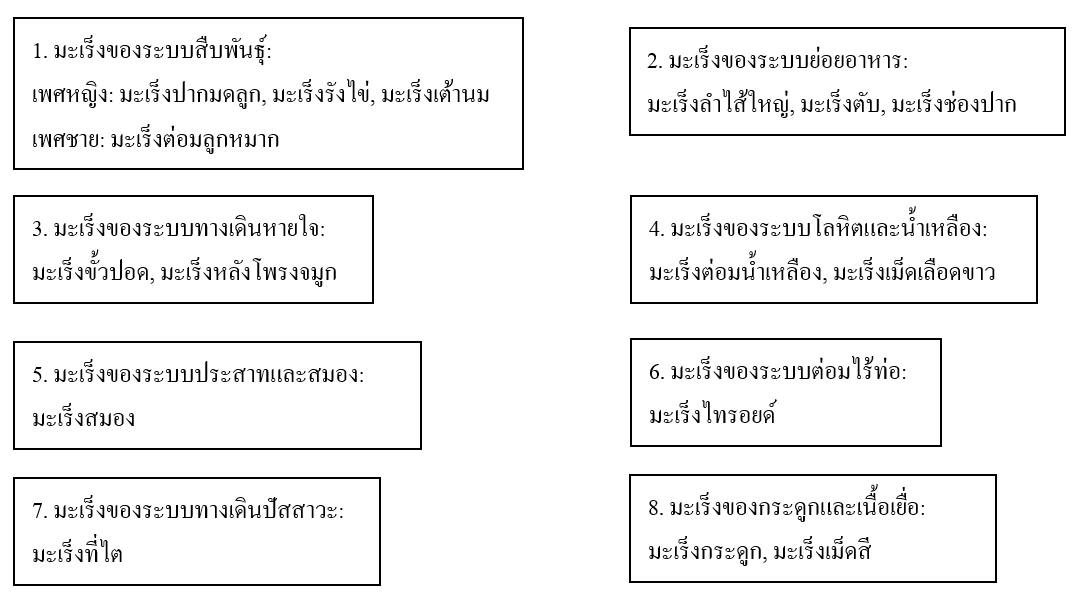

In [204]:
image_path = '/content/drive/MyDrive/DPDM2024_Exam/cancer.png'
img = cv2.imread(image_path)
cv2_imshow(img)

In [205]:
# ประเภทของมะเร็งแต่ละกลุ่ม
sex_type = ['มะเร็งปากมดลูก', 'มะเร็งรังไข่', 'มะเร็งเต้านม', 'มะเร็งต่อมลูกหมาก']
digestive_type = ['มะเร็งลำไส้ใหญ่', 'มะเร็งตับ', 'มะเร็งช่องปาก']
respiratory_type = ['มะเร็งขั้วปอด', 'มะเร็งหลังโพรงจมูก']
blood_lymphatic_type = ['มะเร็งเม็ดเลือดขาว', 'มะเร็งต่อมน้ำเหลือง']
nervous_brain_type = ['มะเร็งสมอง']
endocrine_type = ['มะเร็งไทรอยด์']
urinary_type = ['มะเร็งไต', 'มะเร็งกระเพาะปัสสาวะ']
bone_tissue_type = ['มะเร็งกระดูก', 'มะเร็งเม็ดสี']

# รวมประเภทมะเร็งทั้งหมด
cancer_type = {
    'sex_type': sex_type,
    'digestive_type': digestive_type,
    'respiratory_type': respiratory_type,
    'blood_lymphatic_type': blood_lymphatic_type,
    'nervous_brain_type': nervous_brain_type,
    'endocrine_type': endocrine_type,
    'urinary_type': urinary_type,
    'bone_tissue_type': bone_tissue_type
}

print(cancer_type)


{'sex_type': ['มะเร็งปากมดลูก', 'มะเร็งรังไข่', 'มะเร็งเต้านม', 'มะเร็งต่อมลูกหมาก'], 'digestive_type': ['มะเร็งลำไส้ใหญ่', 'มะเร็งตับ', 'มะเร็งช่องปาก'], 'respiratory_type': ['มะเร็งขั้วปอด', 'มะเร็งหลังโพรงจมูก'], 'blood_lymphatic_type': ['มะเร็งเม็ดเลือดขาว', 'มะเร็งต่อมน้ำเหลือง'], 'nervous_brain_type': ['มะเร็งสมอง'], 'endocrine_type': ['มะเร็งไทรอยด์'], 'urinary_type': ['มะเร็งไต', 'มะเร็งกระเพาะปัสสาวะ'], 'bone_tissue_type': ['มะเร็งกระดูก', 'มะเร็งเม็ดสี']}


In [206]:
cancer_counts = {}
for cancer_group, cancer_list in cancer_type.items():
    matched_comments = set()  # ใช้ set เพื่อเก็บคอมเมนต์ที่ตรงกับคำใน cancer_list
    for cancer in cancer_list:
        matching = cancer_related_comments[cancer_related_comments['comments'].str.contains(cancer, na=False)]
        matched_comments.update(matching.index)  # เพิ่ม index ของคอมเมนต์ที่ตรงกับคำใน set
    cancer_counts[cancer_group] = len(matched_comments)  # นับจำนวนคอมเมนต์ที่ไม่ซ้ำกัน

print(cancer_counts)

{'sex_type': 102, 'digestive_type': 85, 'respiratory_type': 10, 'blood_lymphatic_type': 68, 'nervous_brain_type': 9, 'endocrine_type': 25, 'urinary_type': 6, 'bone_tissue_type': 14}


In [207]:
print(max(cancer_counts, key=cancer_counts.get))

sex_type


In [208]:
# prompt: แสดงชนิดของมะเร็ง sex_type ทั้งหมดโดยเอาข้อมูลทั้ง record จาก cancer_related_comments

# แสดงชนิดของมะเร็ง sex_type ทั้งหมดโดยเอาข้อมูลทั้ง record จาก cancer_related_comments
sex_type_comments = cancer_related_comments[cancer_related_comments['comments'].str.contains('|'.join(sex_type), na=False)]
sex_type_comments


,name,comments,count like,count replies
3,Wansook Chompoo Ploy,#มะเร็งปากมดลูกระยะCINlll เกือบเข้าระยะ 1 ตอนอ...,1600,44
6,Pam Prechanont,คุณแม่เป็นมะเร็งเม็ดเลือดขาวแบบเฉียบพลันค่ะ คุ...,300,9
20,Nitchapan Boonlai,คุณแม่บุญธรรม มีศักดิ์เป็นป้าของเราเองสายตรง ไ...,191,4
22,รมิตา ผู้หญิงที่เป็นของขวัญ,สำหรับมะเร็งปากมดลูก แนะนำให้ตรวจภายในเป็นประจ...,102,31
26,SiRi Olive Nareenat,คุณแม่เรา ทางกรรมพันธุ์ไม่มีใครเป็นมะเร็งเลยสั...,73,6
...,...,...,...,...
702,Pirawan Saowijit,คุณพ่อเป็นมะเร็งต่อมลูกหมากค่ะ ถ้ามีอาการ ฉี่ข...,0,0
716,Beer Thomthong,ปี63เป็นมะเร็งรังไข่ค่ะระยะ1C อาการ ท้องโต ตอน...,0,0
769,โชติวิทย์ ฉัตรบริบูรณ์คติ,พ่อจู่ๆปวดคอมาก พาไปหาหมอบอกเป็นกระดูกทับเส้นป...,0,0
852,Patti Van Arnam,เป็นมะเร็งเต้านมตอนอายุ 48 ค่ะ เริ่มจากอาการเจ...,0,0


พบว่าชนิดของมะเร็งที่พบผู้ป่วยจากคอมเม้นท์สูงที่สุด คือ มะเร็งระบบสืบพันธุ์

อีกทั้งยังสอดคล้องกับข้างบนที่บอกว่า เพศหญิงจะเป็นมะเร็งมากกว่าเพศชาย